In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-


# Deep Neural Networks

## Session 21a

## Revisit
- Purpose of this note book to remind simplest way implement neural network
- Tensorflow
- Wine dataset
- Simplest model
- No libraries


<img src='../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

In [4]:
# Lets import some libraries
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf

2024-06-18 08:43:02.163143: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-18 08:43:02.163193: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-18 08:43:02.164401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-18 08:43:02.170506: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 08:43:03.030523: W tensorflow/compiler/tf2

In [5]:
physical_devices = tf.config.list_physical_devices('GPU') 

if len(physical_devices) > 0:
    
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

2024-06-18 08:43:05.099074: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-18 08:43:05.138897: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-18 08:43:05.139275: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
# Some basic parameters

RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible results
tf.random.set_seed(RANDOM_STATE)

EPOCHS = 100  # number of cycles to run start small once model is ok increase

TEST_SIZE = 0.2 # What fraction we want to keep for testing

# Not deeded as fit method has default value
# BATCH_SIZE = 32

## Load Wine Data

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

- The attributes are (dontated by Riccardo Leardi, 
	riclea@anchem.unige.it )
 	1. Alcohol
 	2. Malic acid
 	3. Ash
	4. Alcalinity of ash  
 	5. Magnesium
	6. Total phenols
 	7. Flavanoids
 	8. Nonflavanoid phenols
 	9. Proanthocyanins
	10. Color intensity
 	11. Hue
 	12. OD280/OD315 of diluted wines
 	13. Proline            

- Number of Instances

    1. class 1 59
	2. class 2 71
	3. class 3 48

- Number of Attributes:	13

7. For Each Attribute:
- All attributes are continuous
- No statistics available, but suggest to standardize variables for certain uses (e.g. for us with classifiers which are NOT scale invariant)

**NOTE:** 1st attribute is class identifier (1-3)

In [7]:
data_df = pd.read_csv('../../input/machine_learning/wine.csv', header=None)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [8]:
data_df.shape

(178, 14)

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    int64  
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    int64  
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [9]:
# lets find out unique values

for col in data_df.columns:
    print (f'Col: {col} | Values {data_df[col].unique()}')

Col: 0 | Values [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
Col: 1 | Values [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.02

In [10]:
data_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


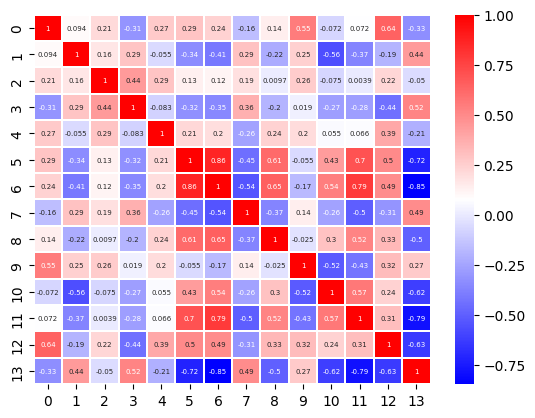

In [11]:
sns.heatmap(data_df.corr(), annot=True, cmap='bwr', linewidths = .2, annot_kws={"size": 5})
plt.show()

# Train Test Split

In [12]:
labels = data_df[data_df.columns[-1]]
labels.shape

(178,)

In [13]:
features_df = data_df.drop(data_df.columns[-1], axis = 1)
features_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
X_train , X_test, y_train, y_test = train_test_split(features_df, labels, 
                                                     test_size=TEST_SIZE, 
                                                     stratify=labels,
                                                     random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((142, 13), (36, 13), (142,), (36,))

# Transform data

In [15]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

type(X_train), type(X_test), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

# Prepare model

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation ='relu'),
    tf.keras.layers.Dense(3)
])


loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# you can use string as well but then spelling mistake can create a bug

model.compile(loss= loss_fn, optimizer = 'adam', metrics=['accuracy'])

2024-06-18 08:44:48.764371: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-18 08:44:48.764658: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-18 08:44:48.764841: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [17]:
history = model.fit ( X_train, y_train,
                     epochs = EPOCHS,
                     validation_data = (X_test, y_test),
                     #batch_size = BATCH_SIZE,
                     verbose=2)

Epoch 1/100


2024-06-18 08:44:50.899502: I external/local_xla/xla/service/service.cc:168] XLA service 0x78ea2cd83c30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-18 08:44:50.899536: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-06-18 08:44:50.904914: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-18 08:44:50.920549: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1718680491.011036   19820 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 - 1s - loss: 1.2590 - accuracy: 0.3028 - val_loss: 1.2969 - val_accuracy: 0.2500 - 1s/epoch - 211ms/step
Epoch 2/100
5/5 - 0s - loss: 1.2144 - accuracy: 0.3099 - val_loss: 1.2484 - val_accuracy: 0.2500 - 42ms/epoch - 8ms/step
Epoch 3/100
5/5 - 0s - loss: 1.1738 - accuracy: 0.3310 - val_loss: 1.2006 - val_accuracy: 0.2778 - 29ms/epoch - 6ms/step
Epoch 4/100
5/5 - 0s - loss: 1.1346 - accuracy: 0.3451 - val_loss: 1.1547 - val_accuracy: 0.3611 - 35ms/epoch - 7ms/step
Epoch 5/100
5/5 - 0s - loss: 1.0952 - accuracy: 0.3662 - val_loss: 1.1119 - val_accuracy: 0.3611 - 31ms/epoch - 6ms/step
Epoch 6/100
5/5 - 0s - loss: 1.0602 - accuracy: 0.3944 - val_loss: 1.0710 - val_accuracy: 0.3889 - 28ms/epoch - 6ms/step
Epoch 7/100
5/5 - 0s - loss: 1.0247 - accuracy: 0.4085 - val_loss: 1.0329 - val_accuracy: 0.3889 - 27ms/epoch - 5ms/step
Epoch 8/100
5/5 - 0s - loss: 0.9930 - accuracy: 0.4155 - val_loss: 0.9966 - val_accuracy: 0.3889 - 34ms/epoch - 7ms/step
Epoch 9/100
5/5 - 0s - loss: 0.9613 - accura

In [18]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.259034,0.302817,1.296891,0.250000
1,1.214404,0.309859,1.248414,0.250000
2,1.173830,0.330986,1.200644,0.277778
3,1.134612,0.345070,1.154666,0.361111
4,1.095193,0.366197,1.111887,0.361111


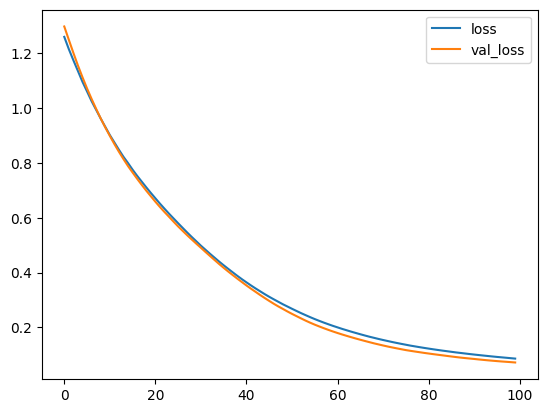

In [19]:
ax = hist_df.plot(y=['loss', 'val_loss'])

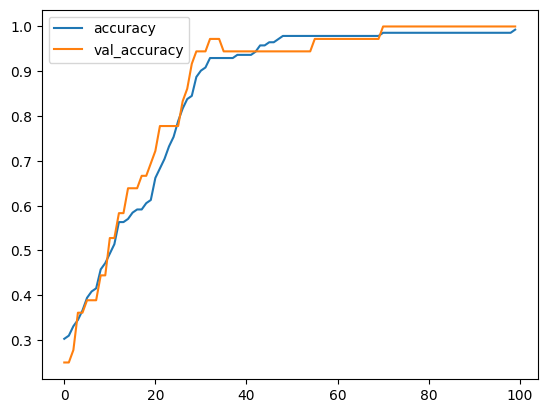

In [20]:
ax = hist_df.plot(y=['accuracy', 'val_accuracy'])

In [21]:
# make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [22]:
# this line will throw error
#accuracy_score(y_train, y_train_pred)

In [23]:
y_train_pred.argmax(axis = 1)

array([0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2,
       1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2, 2, 1, 0,
       1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 1,
       2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2,
       1, 1, 1, 0, 1, 2, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 2, 1, 0, 1, 1, 0, 2, 2])

In [24]:
accuracy_score(y_train, y_train_pred.argmax(axis = 1))

0.9929577464788732

In [25]:
accuracy_score(y_test, y_test_pred.argmax(axis = 1))

1.0

In [26]:
print(classification_report(y_test, y_test_pred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [27]:
confusion_matrix(y_test, y_test_pred.argmax(axis = 1))

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]])